# Assignment 3

## Question 1

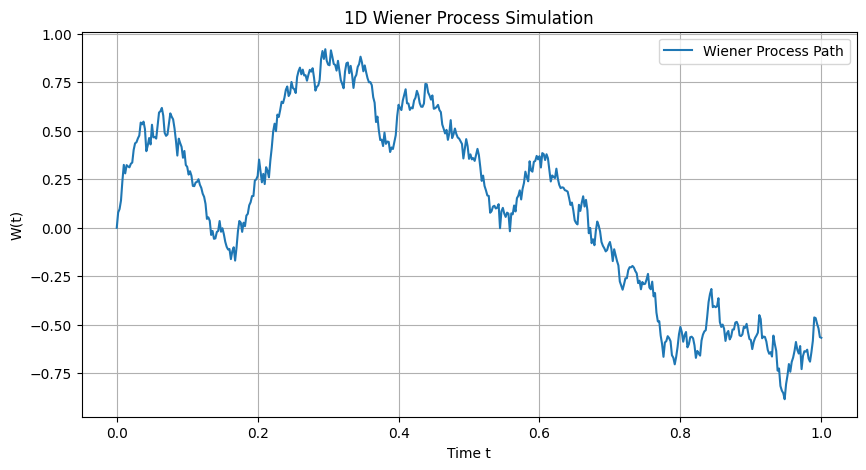

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1.0              # total time
N = 500              # number of time steps
dt = T / N           # time step
t = np.linspace(0, T, N+1)  # time grid

# Wiener process (Brownian motion) simulation
np.random.seed(0)  # for reproducibility
dW = np.random.normal(0, np.sqrt(dt), size=N)  # increments
W = np.zeros(N+1)                              # initialize W(0) = 0
W[1:] = np.cumsum(dW)                          # cumulative sum to get W(t)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(t, W, label='Wiener Process Path')
plt.title('1D Wiener Process Simulation')
plt.xlabel('Time t')
plt.ylabel('W(t)')
plt.grid(True)
plt.legend()
plt.show()

## Question 2

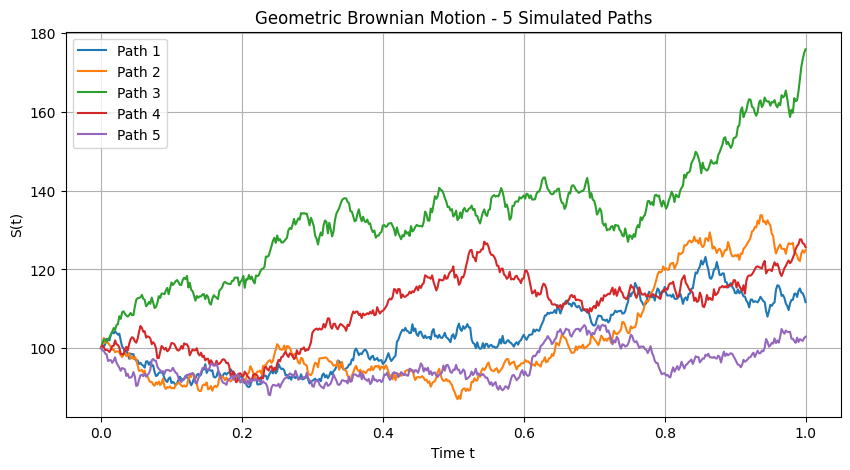

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1.0               # total time
N = 500               # number of steps
dt = T / N            # time step
t = np.linspace(0, T, N+1)  # time grid

S0 = 100              # initial value
alpha = 0.1           # drift
sigma = 0.2           # volatility
num_paths = 5         # number of GBM paths

# Seed for reproducibility
np.random.seed(42)

# Simulate GBM paths
paths = np.zeros((num_paths, N+1))

for i in range(num_paths):
    W = np.zeros(N+1)
    dW = np.random.normal(0, np.sqrt(dt), size=N)
    W[1:] = np.cumsum(dW)

    exponent = sigma * W + (alpha - 0.5 * sigma**2) * t
    paths[i] = S0 * np.exp(exponent)

# Plotting
plt.figure(figsize=(10, 5))
for i in range(num_paths):
    plt.plot(t, paths[i], label=f'Path {i+1}')
plt.title('Geometric Brownian Motion - 5 Simulated Paths')
plt.xlabel('Time t')
plt.ylabel('S(t)')
plt.legend()
plt.grid(True)
plt.show()

## Question 3

In [ ]:
import numpy as np

# Parameters
s = 0.3
t = 0.7
N = 10000  # number of simulations

# Generate Brownian motion samples at s and t
np.random.seed(1)
W_s = np.random.normal(0, np.sqrt(s), size=N)
W_t = W_s + np.random.normal(0, np.sqrt(t - s), size=N)  # use independent increment

# Estimate E[W_s * W_t]
expected_value = np.mean(W_s * W_t)

print(f"Estimated E[W_s * W_t] = {expected_value:.4f}")
print(f"Expected (theoretical) min(s, t) = {min(s, t)}")

Estimated E[W_s * W_t] = 0.3048
Expected (theoretical) min(s, t) = 0.3


## Question 4

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
s = 0.3
t = 0.9
N = 10000  # number of simulations

# Simulate increments
np.random.seed(10)
W_s = np.random.normal(0, np.sqrt(s), size=N)
W_t = W_s + np.random.normal(0, np.sqrt(t - s), size=N)
increments = W_t - W_s

# Check mean and variance of W_t - W_s
mean_inc = np.mean(increments)
var_inc = np.var(increments)

print(f"Mean of W_t - W_s ≈ {mean_inc:.4f} (expected: 0)")
print(f"Variance of W_t - W_s ≈ {var_inc:.4f} (expected: {t - s})")

# Check independence of non-overlapping increments
# [0, s] and [s, t] intervals
inc1 = np.random.normal(0, np.sqrt(s), size=N)
inc2 = np.random.normal(0, np.sqrt(t - s), size=N)

correlation = np.corrcoef(inc1, inc2)[0, 1]
print(f"Correlation between non-overlapping increments ≈ {correlation:.4f} (expected: 0)")

Mean of W_t - W_s ≈ -0.0049 (expected: 0)
Variance of W_t - W_s ≈ 0.6082 (expected: 0.6000000000000001)
Correlation between non-overlapping increments ≈ -0.0104 (expected: 0)


## Question 5

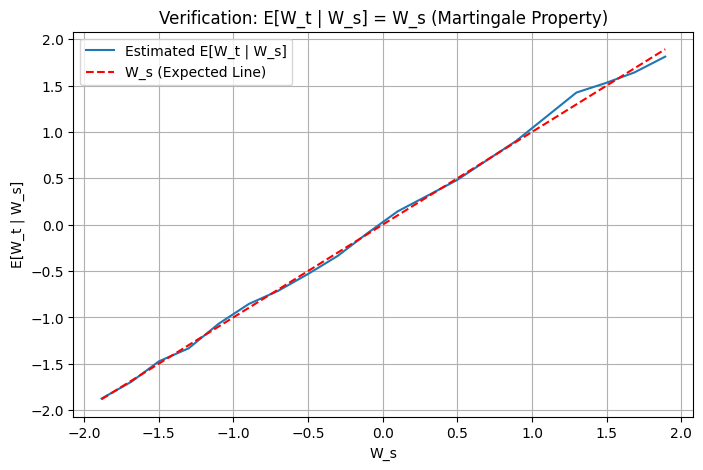

In [ ]:
import numpy as np

# Parameters
s = 0.7
t = 1.2
N = 10000  # number of simulations

# Simulate W_s and W_t
np.random.seed(123)
W_s = np.random.normal(0, np.sqrt(s), size=N)
W_t = W_s + np.random.normal(0, np.sqrt(t - s), size=N)

# Bin W_s values to compute conditional expectation E[W_t | W_s ≈ x]
bins = np.linspace(-2, 2, 21)
digitized = np.digitize(W_s, bins)
conditional_expectation = []
bin_centers = []

for i in range(1, len(bins)):
    mask = digitized == i
    if np.any(mask):
        conditional_expectation.append(np.mean(W_t[mask]))
        bin_centers.append(np.mean(W_s[mask]))

# Plot conditional expectation vs W_s
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(bin_centers, conditional_expectation, label='Estimated E[W_t | W_s]')
plt.plot(bin_centers, bin_centers, 'r--', label='W_s (Expected Line)')
plt.xlabel('W_s')
plt.ylabel('E[W_t | W_s]')
plt.title('Verification: E[W_t | W_s] = W_s (Martingale Property)')
plt.grid(True)
plt.legend()
plt.show()